# COVID-19 | DATA ANALYSIS | CASE STUDY 

## Import modules

In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## Importing covid19 dataset

In [18]:
corona_dataset = pd.read_csv(r"G:\PYTHON JUPYTER NOTEBOOK\python projects csv files\Covid 19\COVID19-Data-Analysis-Using-Python-master\covid19_Confirmed_dataset.csv")

In [19]:
corona_dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
corona_dataset.shape   # 266 rows and 104 columns

(266, 104)

In [21]:
columns = corona_dataset.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

### Delete the useless columns

In [22]:
#Latitude and Longitude are not important features for us here.
corona_dataset.drop(["Lat","Long"], axis=1, inplace=True)

In [23]:
corona_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregating the rows by the country

In [24]:
corona_dataset_aggregated = corona_dataset.groupby("Country/Region").sum()

In [25]:
corona_dataset_aggregated.head()

#After aggregation, the index of the dataframe is the column at which we aggregated.

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [26]:
corona_dataset_aggregated.shape

(187, 100)

### Visualizing data related to a country

In [27]:
corona_dataset_aggregated.loc["China"]
#will return pandas series

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

### Calculating a good measure reperestend as a number, describing the spread of the virus in a country

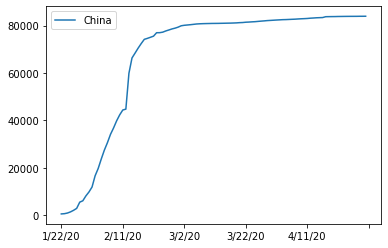

In [28]:
corona_dataset_aggregated.loc["China"].plot()
plt.legend()
#will plot the values on different date

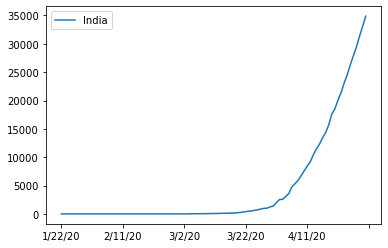

In [29]:
corona_dataset_aggregated.loc["India"].plot()
plt.legend()

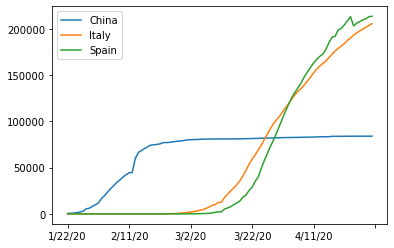

In [30]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

Spread of the virus in China for the first 3 dates only

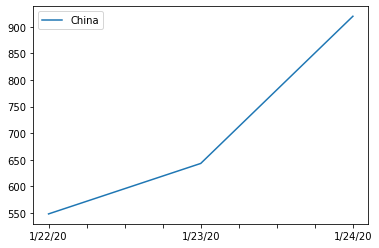

In [31]:
corona_dataset_aggregated.loc['China'][:3].plot()
plt.legend()

In [ ]:
# In the 1st 24 hrs, an increase in case (550 to 650) by 100
# In the 2nd 24 hrs, an increase (650 to 900) by 250

### Caculating the first derivative of the curve

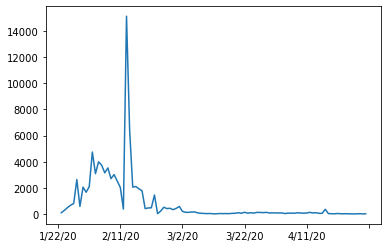

In [35]:
corona_dataset_aggregated.loc['China'].diff().plot()
#This plot shows us the change in infection rate day by day and what we are looking for is the maximum number.

### find maxmimum infection rate for China

In [36]:
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [37]:
corona_dataset_aggregated.loc['India'].diff().max()

1893.0

In [38]:
corona_dataset_aggregated.loc['Italy'].diff().max()

6557.0

### find maximum infection rate for all of the countries

In [39]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [40]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [41]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### create a new dataframe with only needed column

In [42]:
covid_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [43]:
covid_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [44]:
covid_data.shape

(187, 1)

## Importing the other dataset

In [45]:
happiness_report = pd.read_csv(r"G:\PYTHON JUPYTER NOTEBOOK\python projects csv files\Covid 19\COVID19-Data-Analysis-Using-Python-master\worldwide_happiness_report.csv")

In [46]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [47]:
happiness_report.drop(["Overall rank", "Score", "Generosity", "Perceptions of corruption"], axis =1, inplace=True)

In [48]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### changing the indices of the dataframe

In [49]:
happiness_report.set_index("Country or region", inplace=True)

In [50]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining two datasets

In [51]:
covid_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [52]:
covid_data.shape

(187, 1)

In [53]:
happiness_report.head() 

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [55]:
happiness_report.shape     #156 countries, less than corona data

(156, 4)

In [56]:
# Performing the Inner join
final_data = covid_data.join(happiness_report, how = "inner")

In [57]:
final_data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Correlation matrix

In [59]:
final_data.corr()

# There is +ve correlation between max_infection-rate and all other features.

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results

In [60]:
final_data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

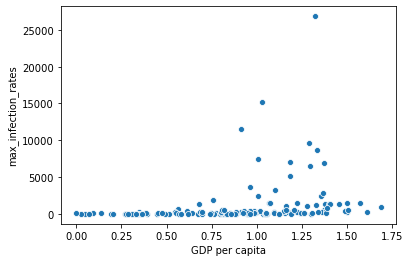

In [61]:
x = final_data["GDP per capita"]
y = final_data["max_infection_rates"]
sns.scatterplot(x,y)

#We can see the values need different scaling

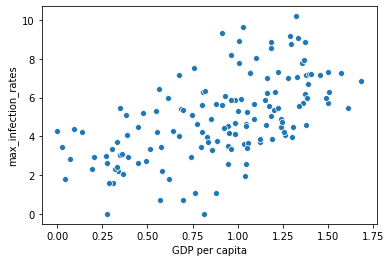

In [62]:
# apply log scaling to y
x = final_data["GDP per capita"]
y = final_data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

#Now we can see +ve correlation

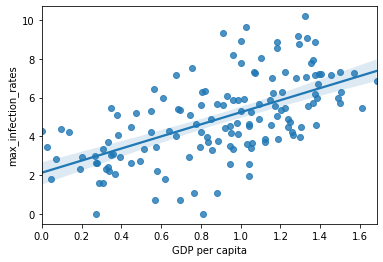

In [63]:
# regplot see regression line
x = final_data["GDP per capita"]
y = final_data["max_infection_rates"]
sns.regplot(x,np.log(y))

# with +ve slope 

### Plotting Social support vs maximum Infection rate

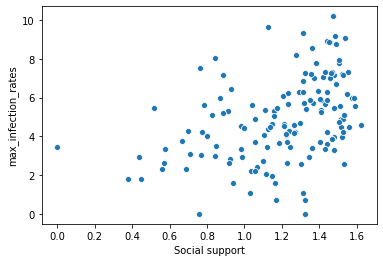

In [64]:
x = final_data["Social support"]
y = final_data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

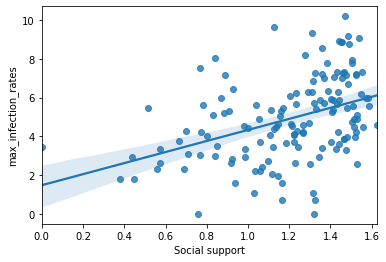

In [65]:
x = final_data["Social support"]
y = final_data["max_infection_rates"]
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

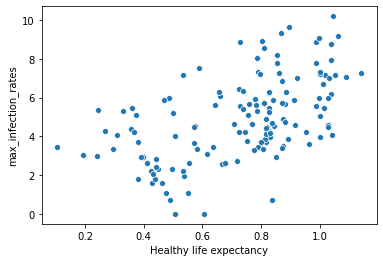

In [66]:
x = final_data["Healthy life expectancy"]
y = final_data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

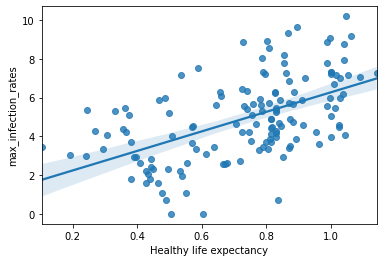

In [67]:
x = final_data["Healthy life expectancy"]
y = final_data["max_infection_rates"]
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

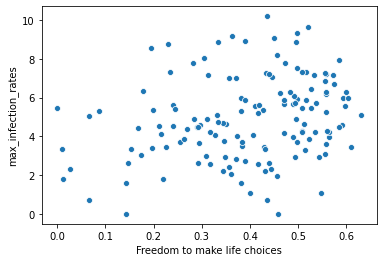

In [68]:
x = final_data["Freedom to make life choices"]
y = final_data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

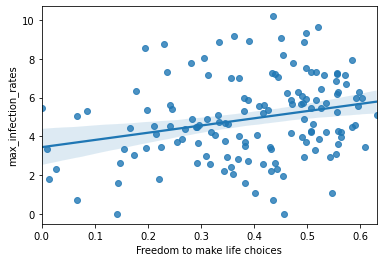

In [69]:
x = final_data["Freedom to make life choices"]
y = final_data["max_infection_rates"]
sns.regplot(x,np.log(y))


### CASE STUDY